# 

In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('Dataset.csv')
data=data.replace(np.nan, 'null', regex=True)

TWEET_DATA = pd.read_csv("Dataset.csv")
TWEET_DATA=TWEET_DATA.replace(np.nan, 'null', regex=True)

# menghitung variabel katogori pada kolom Sentimen
TWEET_DATA['sentimen'].value_counts()

negatif    1610
positif    1390
Name: sentimen, dtype: int64

<h2><center>Tampil Dataset</center></h2>

In [2]:
TWEET_DATA

,user,tweet,sentimen
0,ziggyzella,"YUUUKZ dibaca thread ini, saudara-saudara!\n\n...",positif
1,zhongruihhhe,"Yuk kesini, bagi yg mau mendengar, berpendapat...",positif
2,zhifaa,"Yuk jangan fokus ke RKUHP, RUU PKS &amp; UU KP...",positif
3,zharfaqonita,Yuk baca biar ngerti PERSOALAN tentang RKUHP h...,positif
4,zfird,Yth Bp Presiden @jokowi. Mohon tolak kriminali...,positif
...,...,...,...
2995,__mmmia_,"""Belom baca UU sampe mgelantur kemana mana tuh...",negatif
2996,__leevia__,"""ayo ikut demo besok! T, ini ttg rkuhp lho."" k...",negatif
2997,__honeystars,"""anak hukum kok ga peduli politik""\nya ngapain...",negatif
2998,__habel,"""Agar kalo teman teman kami tertangkap oleh KP...",negatif


# Text Preprocessing

In [3]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ CLEANING ---------

def remove_tweet_special(text):
    # remove tab, new line
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['tweet'] = TWEET_DATA['tweet'].apply(remove_singl_char)

#print('Cleaning Result : \n') 
#print(TWEET_DATA['tweet'].head(5))
#print('\n\n')

In [4]:
import string 
import re

# ------ CASE FOLDING --------

# gunakan fungsi Series.str.lower() pada Pandas
TWEET_DATA['tweet'] = TWEET_DATA['tweet'].str.lower()

#print('Case Folding Result : \n')
#print(TWEET_DATA['tweet'].head(5))
#print('\n\n')

In [5]:
# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 


# NLTK word tokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['tweet'].apply(word_tokenize_wrapper)

#print('Tokenizing Result : \n') 
#print(TWEET_DATA['tweet_tokens'].head())
#print('\n\n\n')

In [6]:
from nltk.probability import FreqDist
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TWEET_DATA['tweet_tokens_fdist'] = TWEET_DATA['tweet_tokens'].apply(freqDist_wrapper)

#print('Frequency Tokens : \n') 
#print(TWEET_DATA['tweet_tokens_fdist'].head(10).apply(lambda x : x.most_common()))
#print('\n\n')

In [7]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# additional stopword
list_stopwords.extend(["yg", "dg", "rt", "dgn", "ny", "d", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't', 
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 


#print(TWEET_DATA['tweet_tokens_WSW'].head())

In [8]:
normalizad_word = pd.read_excel("normal.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

#TWEET_DATA['tweet_normalized'].head(5)

In [9]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
#print(TWEET_DATA['tweet_tokens_stemmed'])

C:\Users\alfai\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


8137
------------------------
yuuukz : yuuukz
dibaca : baca
thread : thread
saudarasaudara : saudarasaudara
dapet : dapet
insight : insight
harus : harus
ngotot : ngotot
penundaan : tunda
rkuhp : rkuhp
nunda : nunda
ngga : ngga
mendukung : dukung
indonesia : indonesia
kuhp : kuhp
engga : engga
gitu : gitu
mbok : mbok
pasal : pasal
bermasalah : masalah
dibetulin : dibetulin
gituuh : gituuh
ayo : ayo
kesini : kesini
mendengar : dengar
berpendapat : dapat
berdialog : dialog
mumpung : mumpung
guruguru : guruguru
menyusunnya : susun
semarang : semarang
segi : segi
filosofis : filosofis
sosiologis : sosiologis
yuridis : yuridis
peraturan : atur
perundangundangan : perundangundangan
fokus : fokus
ruu : ruu
pks : pks
uu : uu
kpk : kpk
pembakaran : bakar
hutan : hutan
kalah : kalah
papua : papua
kompleks : kompleks
coba : coba
nilai : nilai
jakarta : jakarta
mahasiswa : mahasiswa
unjuk : unjuk
disemprot : semprot
gas : gas
air : air
mata : mata
ditodong : todong
senjata : senjata
baca : baca
ng

sebenarnya : benar
skrng : skrng
deh : deh
runyam : runyam
aparat : aparat
kena : kena
org : org
dprnya : dprnya
nyantai : nyantai
kali : kali
teman : teman
ketemu : ketemu
rkhup : rkhup
cocoknya : cocok
anehnya : aneh
drpd : drpd
kebaharuan : baharu
sesuai : sesuai
dab : dab
disetujui : tuju
twitter : twitter
pls : pls
do : do
your : your
magic : magic
perbandingan : banding
kuhpruu : kuhpruu
koperasi : koperasi
lamabaru : lamabaru
uuruu : uuruu
pertanahan : tanah
pemasyarakatan : masyarakat
sda : sda
minerba : minerba
mungkin : mungkin
itb : itb
km : km
terlambat : lambat
tweet : tweet
mengandung : kandung
doa : doa
ruupks : ruupks
ngawur : ngawur
disahin : disahin
tragedi : tragedi
semanggi : semanggi
ii : ii
terulang : ulang
tuuh : tuuh
gajag : gajag
gijig : gijig
hahaha : hahaha
turis : turis
australia : australia
batalkan : batal
kunjungan : kunjung
pariwisata : pariwisata
bali : bal
desak : desak
tuntutan : tuntut
baju : baju
putih : putih
ruukpk : ruukpk
silakan : sila
mundur :

kawan : kawan
kawannya : kawan
peredam : redam
memilih : pilih
tidur : tidur
tertawa : tertawa
kondisi : kondisi
pasang : pasang
telinga : telinga
terkelabui : labu
tolaktunda : tolaktunda
memicu : picu
feedku : feedku
circle : circle
aktivisadvokasimedis : aktivisadvokasimedis
membicarakan : bicara
care : care
ed : ed
thats : thats
good : good
thing : thing
buruburu : buruburu
mendesak : desak
urgent : urgent
tersentuh : sentuh
dipercepat : cepat
penyelesaiannya : selesai
diprotes : protes
scr : scr
luas : luas
spt : spt
napas : napas
desmond : desmond
menekan : tekan
politis : politis
perbuatankinerjanya : perbuatankinerjanya
subyek : subyek
pelakunya : laku
institusinya : institusi
bekukan : beku
bubarkan : bubar
percepat : cepat
pemilu : milu
keren : keren
akal : akal
dibenerin : dibenerin
tutup : tutup
berujung : ujung
kayak : kayak
kebijakan : bijak
secure : secure
parking : parking
ui : ui
massa : massa
tenang : tenang
berlakukan : laku
ahaha : ahaha
priode : priode
melanjutkan 

tvone : tvone
dicatat : catat
siaran : siar
pers : pers
forum : forum
pengada : ada
layanan : layan
perempuan : perempuan
darurat : darurat
ingetin : ingetin
membahas : bahas
ditakutin : ditakutin
hardliner : hardliner
lolos : lolos
bau : bau
nkrindonistan : nkrindonistan
kesempatan : sempat
tipis : tipis
melawan : lawan
beer : beer
pmrnth : pmrnth
koar : koar
ngesahin : ngesahin
kepilih : pilih
ngomongnya : ngomongnya
ngurus : ngurus
main : main
berkali : kali
hasilnya : hasil
dengerin : dengerin
dipending : pending
perhatian : perhati
reda : reda
surprise : surprise
utamanya : utama
yakusa : yakusa
terkadang : terkadang
pahit : pahit
diterima : terima
mengalami : alami
dingingkan : dingingkan
nyinyir : nyinyir
seword : seword
undangundang : undangundang
akui : aku
setujuin : setujuin
marital : marital
rape : rape
bebek : bebek
pekarangan : pekarang
nunjukin : nunjukin
alat : alat
kontrasepsi : kontrasepsi
dkk : dkk
berstatus : status
pembahasannya : bahas
menjamin : jamin
sepengetahu

hasto : hasto
pdi : pdi
sekretaris : sekretaris
pratikno : pratikno
ber : ber
bentuk : bentuk
arogansi : arogansi
catatan : catat
arogan : arogan
penjil : jil
detik : detik
ocean : ocean
dno : dno
latest : latest
information : information
komisi : komisi
iii : iii
fpdip : fpdip
herman : herman
hery : hery
membela : bela
budayawan : budayawan
amankan : aman
joko : joko
widodo : widodo
habis : habis
sy : sy
ditundadibatalkan : ditundadibatalkan
jln : jln
dukungan : dukung
urgensinya : urgensi
krusial : krusial
posisi : posisi
awkarin : awkarin
bagikan : bagi
nasi : nasi
kotak : kotak
demonstran : demonstran
ancam : ancam
catnobi : catnobi
legacy : legacy
buying : buying
ditebak : tebak
tokoh : tokoh
nguotot : nguotot
ybs : ybs
ngegolin : ngegolin
pengen : ken
ibukota : ibukota
ngejar : ngejar
prolegnas : prolegnas
inisiasi : inisiasi
buzzerp : buzzerp
kutip : kutip
partaigerindraitu : partaigerindraitu
kepadatempohari : kepadatempohari
lngsng : lngsng
proses : proses
akn : akn
brlanjut :

kowe : kowe
mager : mager
su : su
menjaga : jaga
uggas : uggas
kerumah : rumah
tetangga : tetangga
ngancurin : ngancurin
pohon : pohon
tomat : tomat
bening : bening
reformasi : reformasi
dikorupsi : korupsi
ngucapin : ngucapin
trimaksih : trimaksih
kepo : kepo
anindya : anindya
disalahkan : salah
andaikata : andaikata
menolakpun : tolak
padahalnya : padahal
menahan : tahan
tuan : tuan
budiman : budiman
menentukan : tentu
moril : moril
materiil : materiil
bicara : bicara
seakanakan : seakanakan
walafiat : walafiat
pure : pure
bukti : bukti
bersih : bersih
tampa : tampa
ditunggangi : tunggang
ir : ir
up : up
seruannya : seru
menjerat : jerat
dilonggarkan : longgar
asfinawati : asfinawati
menghadapi : hadap
bencana : bencana
dimusnahkan : musnah
tertunda : tunda
riang : riang
cucunya : cucu
cuit : cuit
max : max
walden : walden
kelimanya : lima
tuntas : tuntas
uda : uda
apem : apem
milikmu : milik
cengeng : cengeng
paksa : paksa
ma : ma
hadehhh : hadehhh
semprot : semprot
canon : canon
wa

pertahanan : tahan
koreksi : koreksi
serangkaian : rangkai
kepala : kepala
departemen : departemen
strategis : strategis
elang : elang
lazuardi : lazuardi
thdp : thdp
dijadwalkan : jadwal
wartawan : wartawan
sore : sore
komentar : komentar
praktisi : praktisi
konteks : konteks
parsial : parsial
kepotong : potong
karakter : karakter
twitterinstagram : twitterinstagram
icjr : icjr
desember : desember
meneruskan : terus
drafnya : draf
gumantia : gumantia
lagisampeyan : lagisampeyan
wes : wes
dadi : dadi
maneh : maneh
kriting : kriting
plerrr : plerrr
melebar : lebar
modelan : model
pengecut : kecut
sebenaranya : benara
dimaki : maki
penghujung : hujung
bhaktinya : bhaktinya
ngebut : ngebut
pengganti : ganti
mengusik : usik
pindah : pindah
meikarta : meikarta
mashasiswa : mashasiswa
dialog : dialog
beliyo : beliyo
oknumoknum : oknumoknum
jabatan : jabat
masue : masue
ser : ser
seru : seru
buang : buang
biarkan : biar
makamah : makamah
pepet : pepet
teroooossssss : teroooossssss
yatuhan : y

militerisme : militerisme
tuntaskan : tuntas
pelanggaran : langgar
pelajar : ajar
diperkosa : perkosa
menciptakan : cipta
dipaksakan : paksa
ideologi : ideologi
filsafat : filsafat
tetek : tetek
bengek : bengek
analis : analis
anasir : anasir
pandai : pandai
analogi : analogi
genting : genting
contohnya : contoh
zonasi : zonasi
useless : useless
sosial : sosial
ngentang : ngentang
ente : ente
pembajasan : pembajasan
singkat : singkat
dinaikin : dinaikin
final : final
viii : viii
rujukan : rujuk
bubur : bubur
pasalpasalnyaaa : pasalpasalnyaaa
menjaring : jaring
pokoknya : pokok
sempurnakan : sempurna
terussss : terussss
doorprize : doorprize
sahaja : sahaja
gegap : gegap
gempitanya : gempita
hongkong : hongkong
leyehleyeh : leyehleyeh
mulut : mulut
bersorak : sorak
mencampuri : campur
ngebacot : ngebacot
ngedougie : ngedougie
koplo : koplo
daftar : daftar
idn : idn
times : times
hindia : hindia
hadeh : hadeh
terdungu : dungu
wacana : wacana
beranak : anak
liburan : libur
kulineran : kul

bills : bills
amit : amit
seregresif : regresif
everything : everything
his : his
power : power
stand : stand
against : against
coy : coy
inget : inget
perseturuan : seturu
fhui : fhui
kuliah : kuliah
sik : sik
meledak : ledak
harapapabila : harapapabila
menghasilkan : hasil
direvisigue : direvisigue
hubungannya : hubung
didalam : dalam
dampaknya : dampak
mandiri : mandiri
bergantung : gantung
mmprgnkn : mmprgnkn
merealisasikan : realisasi
absent : absent
keluarin : keluarin
larilarian : larilarian
mikirin : mikirin
transport : transport
transformer : transformer
berhrp : berhrp
dame : dame
influensyer : influensyer
dumay : dumay
melulu : melulu
diturunin : diturunin
ujan : ujan
didatengin : didatengin
manasinnya : manasinnya
mz : mz
diprovokatori : provokator
modern : modern
terpengaruh : pengaruh
mengarahkan : arah
infonya : info
gillsss : gillsss
dianut : anut
astaghfirullahaladzim : astaghfirullahaladzim
aduwwwww : aduwwwww
ppkn : ppkn
ges : ges
kabem : kabem
gemes : gemes
ajig : a

ditolakbkn : ditolakbkn
ngarab : ngarab
ingus : ingus
peta : peta
kelompoknya : kelompok
sebutin : sebutin
cheers : cheers
haha : haha
ngomongin : ngomongin
penjelasanya : jasa
gup : gup
ilmunya : ilmu
ray : ray
pembawa : bawa
pangan : pangan
choky : choky
mappi : mappi
respect : respect
murni : murni
dikotori : kotor
nasionalisme : nasionalisme
bertele : tele
tele : tele
kepemerintahan : perintah
mengadili : adil
nyangkutin : nyangkutin
woeeyy : woeeyy
noraakk : noraakk
sasarannya : sasar
drpada : drpada
pegang : pegang
woww : woww
jeli : jeli
permasalah : masa
serukan : seru
rekan : rekan
naikin : naikin
satria : satria
diboncengin : diboncengin
ae : ae
gaonok : gaonok
bedane : bedane
selow : selow
ngerasa : ngerasa
dibhas : dibhas
kta : kta
sumberny : sumberny
msi : msi
bekas : bekas
mreka : mreka
substansinya : substansi
sepaham : paham
sosialisasi : sosialisasi
kekuarangannya : arang
dipolitisi : politis
hukumonline : hukumonline
ilustrasikan : ilustrasi
unik : unik
smg : smg
tuju

wakaji : wakaji
dulah : dulah
ndry : ndry
poy : poy
evaluasi : evaluasi
pesimis : pesimis
ngerjain : ngerjain
alfaris : alfaris
topik : topik
kebencanaan : bencana
sipilgakkummiliter : sipilgakkummiliter
dre : dre
mengawasi : awas
sender : sender
bahasnya : bahas
ne : ne
kekebun : kebun
ketetangga : tetangga
wk : wk
thx : thx
mengajukn : mengajukn
pasalnyakarena : pasalnyakarena
ngk : ngk
diperjelas : jelas
lagisetelah : lagisetelah
tbf : tbf
mbakbyk : mbakbyk
iyaa : iyaa
patokan : patok
mengharga : harga
individu : individu
tlah : tlah
tsbyg : tsbyg
hx : hx
kang : kang
mahfud : mahfud
bersifat : sifat
universal : universal
ketata : tata
negaraan : negara
otomatis : otomatis
bsk : bsk
dikasih : kasih
kesana : kesana
mahh : mahh
mentah : mentah
sesui : sesui
azzam : azzam
pelarangan : larang
persetubuhan : tubuh
pembunuhan : bunuh
katholik : katholik
gereja : gereja
kanan : kanan
judul : judul
temanya : tema
terbatas : batas
iklan : iklan
dikasi : kasi
arahan : arah
setauku : tau
mendun

kanal : kanal
sindonews : sindonews
teelku : teelku
keresahankeresahan : keresahankeresahan
so : so
tolakrkuhp : tolakrkuhp
pembenahan : benah
penghancuran : hancur
ceritanya : cerita
romansanya : romansa
nggk : nggk
sumbu : sumbu
ndasmu : ndasmu
ngunu : ngunu
pesantren : pesantren
menngatur : menngatur
katekisasi : katekisasi
pesertanya : serta
barbar : barbar
publikasi : publikasi
perancang : ancang
fak : fak
parlemenayo : parlemenayo
bukaan : buka
treak : treak
presidenlah : presiden
trua : trua
scroll : scroll
tl : tl
insya : insya
lindungan : lindung
overcapacity : overcapacity
berteriak : teriak
pengkritik : kritik
bertambah : tambah
cacatnya : cacat
rakyatnya : rakyat
jejak : jejak
dnger : dnger
mentri : tri
melunak : lunak
mahasiwa : mahasiwa
disosialisasikan : sosialisasi
lpk : lpk
ketenaga : tenaga
usut : usut
stmsmasmk : stmsmasmk
mengaji : aji
mumpungkan : mumpung
wadah : wadah
pengembangan : kembang
skill : skill
kelahi : kelahi
gmana : gmana
usia : usia
maknanya : makna
p

qna : qna
help : help
us : us
following : following
applied : applied
go : go
at : at
night : night
fined : fined
abortion : abortion
jailed : jailed
perludem : perludem
kronologi : kronologi
pembubaran : bubar
kmudian : kmudian
huni : huni
wakanda : wakanda
lokalnya : lokal
file : file
pdfnya : pdfnya
padang : padang
padangpun : padang
obral : obral
takbir : takbir
allahu : allahu
sembunyi : sembunyi
keulang : ulang
bosen : bosen
retweetan : retweetan
antah : antah
berantah : antah
tonjok : tonjok
lusa : lusa
argumentasi : argumentasi
kekurangan : kurang
komplen : komplen
cacian : caci
dpre : dpre
pekok : kok
kerjaannya : kerja
makian : maki
fitnah : fitnah
kepung : kepung
krl : krl
sekitaran : sekitar
jebol : jebol
dkng : dkng
trnkan : trnkan
glp : glp
lihatlah : lihat
aparataparatmu : aparataparatmu
dinamakan : nama
mengayomi : ayom
ite : ite
sakiti : sakit
jember : jember
indonesian : indonesian
sumpa : sumpa
kebangetan : banget
ajakan : aja
tredi : tredi
kuatno : kuatno
mbrebek : 

menindas : tindas
unsoed : unsoed
assalamualaikum : assalamualaikum
wr : wr
wb : wb
dipenghujung : hujung
diskreet : diskreet
digocek : gocek
chibay : chibay
kejalanan : jalan
sinyal : sinyal
negerimu : negeri
kalsel : kalsel
ramairamai : ramairamai
kebiripemberantasan : kebiripemberantasan
lidah : lidah
jeritan : jerit
terhimpit : terhimpit
tanamkan : tanam
mengutuk : kutuk
twelve : twelve
old : old
kid : kid
vine : vine
trying : trying
funny : funny
because : because
wacked : wacked
lmao : lmao
try : try
again : again
apinya : api
padam : padam
kamera : kamera
goronggorong : goronggorong
riuh : riuh
tepuk : tepuk
dipuja : puja
teteskan : tetes
nitip : nitip
aaaah : aaaah
membuahkan : buah
sekjen : sekjen
temui : temu
miskom : miskom
ampyuuuunn : ampyuuuunn
cekokin : cekokin
fekok : fekok
kucluk : kucluk
insyaallah : insyaallah
menyusul : susul
pasca : pasca
batan : batan
jurang : jurang
representasi : representasi
tea : tea
abs : abs
autodidak : autodidak
peretasan : retas
pendidikan

why : why
disegera : segera
krkuhp : krkuhp
nyoh : nyoh
sahke : sahke
wae : wae
gedungmu : gedung
diduduki : duduk
waktune : waktune
panjenengan : panjenengan
pensiyun : pensiyun
tho : tho
iso : iso
amdaikan : amdaikan
numpang : numpang
tenar : tenar
ngebedain : ngebedain
lord : lord
nentang : nentang
mjnta : mjnta
sedeng : sedeng
kabeh : kabeh
kwi : kwi
disahke : disahke
lan : lan
keluargaku : keluarga
omah : omah
ndeso : ndeso
pitik : pitik
tur : tur
awan : awan
dikandang : kandang
diculke : diculke
dolan : dolan
teko : teko
ngendi : ngendi
hasss : hasss
ra : ra
mashookkk : mashookkk
utama : utama
prasaan : prasaan
dek : dek
gelo : gelo
ncam : ncam
mengatasi : atas
kebosanan : bosan
mengantisipasinya : antisipasi
satukan : satu
berketik : ketik
mak : mak
bilangnya : bilang
mainannya : main
facebook : facebook
karetnya : karet
gelang : gelang
slepet : slepet
belayan : bayan
sixtones : sixtones
kpknya : kpknya
cape : cape
yaudalahyaa : yaudalahyaa
horee : horee
spam : spam
ritwitan : r

kontribusi : kontribusi
terangan : terang
kntor : kntor
yaaaa : yaaaa
ngejudge : ngejudge
sneng : sneng
artiny : artiny
think : think
option : option
was : was
established : established
dammit : dammit
need : need
saying : saying
problematic : problematic
wisest : wisest
tandatanganu : tandatanganu
nasionaldemotolakrkuhpricuhsatumahasiswaternatetertembak : nasionaldemotolakrkuhpricuhsatumahasiswaternatetertembak
hot : hot
nowadays : nowadays
mahasiawa : mahasiawa
rusa : rusa
masya : masya
pasalx : pasalx
intruksikan : intruksikan
kader : kader
senusantara : nusantara
oprekan : oprekan
disela : sela
kuadrat : kuadrat
mw : mw
pegi : pegi
bergabung : gabung
menggangu : menggangu
tcoy : tcoy
menyudutkan : sudut
sanggup : sanggup
daya : daya
gedornya : gedor
segimana : segimana
datengin : datengin
haqqul : haqqul
dicintai : cinta
beriburibu : beriburibu
nolep : nolep
san : san
sematamata : sematamata
memelihara : pelihara
ffs : ffs
grgr : grgr
nyokap : nyokap
eug : eug
ngews : ngews
didoron

turunna : turunna
mayday : mayday
liu : liu
siapasiapa : siapasiapa
sekitarmu : sekitar
ag : ag
tersembunyi : sembunyi
pengguguran : gugur
lonte : lonte
gugurin : gugurin
gendheng : gendheng
igstory : igstory
annur : annur
kolom : kolom
orgorg : orgorg
dituju : tuju
cj : cj
cermati : cermat
atuh : atuh
gagasan : gagas
aya : aya
perlawana : perlawana
action : action
dprklo : dprklo
ditetapkan : tetap
bgni : bgni
krg : krg
perpres : pres
nyuruh : nyuruh
perpresperpu : perpresperpu
punten : punten
nulis : nulis
lohhhh : lohhhh
merembet : rembet
gasuka : gasuka
majunya : maju
rinciannya : rinciannya
tameng : tameng
digedung : gedung
panggil : panggil
kekeh : kekeh
remeh : remeh
jarus : jarus
bersinggungan : singgung
arahnya : arah
selakangan : selakangan
ug : ug
tsamara : tsamara
gugatannya : gugat
batasan : batas
minumnya : minum
obat : obat
wkwmwmwm : wkwmwmwm
cie : cie
yeee : yeee
munafikun : munafikun
kh : kh
mahruf : mahruf
angota : angota
sbtllnya : sbtllnya
stdknya : stdknya
mempan 

kagalagian : kagalagian
hotel : hotel
iyalahh : iyalahh
otaknye : otaknye
kospley : kospley
sks : sks
anjer : anjer
paper : paper
wkwkwkwkkw : wkwkwkwkkw
wha : wha
hhhhhhhhh : hhhhhhhhh
mgelantur : mgelantur
ngomen : ngomen
mryasonna : mryasonna
nihyang : nihyang
ngelantur : ngelantur
menyiksa : siksa
mensejahterakan : sejahtera
penindas : tindas
gengs : gengs
budek : budek
emgnya : emgnya
korupsinya : korupsi
tikus : tikus
prestasi : prestasi
mengsahkan : mengsahkan
menyedihkan : sedih
lembagamu : lembaga


{'yuuukz': 'yuuukz', 'dibaca': 'baca', 'thread': 'thread', 'saudarasaudara': 'saudarasaudara', 'dapet': 'dapet', 'insight': 'insight', 'harus': 'harus', 'ngotot': 'ngotot', 'penundaan': 'tunda', 'rkuhp': 'rkuhp', 'nunda': 'nunda', 'ngga': 'ngga', 'mendukung': 'dukung', 'indonesia': 'indonesia', 'kuhp': 'kuhp', 'engga': 'engga', 'gitu': 'gitu', 'mbok': 'mbok', 'pasal': 'pasal', 'bermasalah': 'masalah', 'dibetulin': 'dibetulin', 'gituuh': 'gituuh', 'ayo': 'ayo', 'kesini': 'kesini', 'mendengar': 'dengar', 'berpendapat': 'dapat', 'berdialog': 'dialog', 'mumpung': 'mumpung', 'guruguru': 'guruguru', 'menyusunnya': 'susun', 'semarang': 'semarang', 'segi': 'segi', 'filosofis': 'filosofis', 'sosiologis': 'sosiologis', 'yuridis': 'yuridis', 'peraturan': 'atur', 'perundangundangan': 'perundangundangan', 'fokus': 'fokus', 'ruu': 'ruu', 'pks': 'pks', 'uu': 'uu', 'kpk': 'kpk', 'pembakaran': 'bakar', 'hutan': 'hutan', 'kalah': 'kalah', 'papua': 'papua', 'kompleks': 'kompleks', 'coba': 'coba', 'nilai'

------------------------


C:\Users\alfai\Anaconda3\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [10]:
df = pd.DataFrame(TWEET_DATA)

In [11]:
df['tweet_tokens_stemmed'] = df['tweet_tokens_stemmed'].apply(str)

In [12]:
import ast

def join_text_list(texts):
    texts = ast.literal_eval(texts)
    return ' '.join([text for text in texts])
TWEET_DATA["tweet_join"] = TWEET_DATA["tweet_tokens_stemmed"].apply(join_text_list)

#TWEET_DATA["tweet_join"].head()

In [13]:
import pandas as pd 
DATA=pd.concat([TWEET_DATA.user,TWEET_DATA['tweet_join'],TWEET_DATA.sentimen],axis=1)

In [14]:

from sklearn.feature_extraction.text import TfidfVectorizer

# banyaknya term yang akan digunakan, 
# di pilih berdasarkan top max_features 
# yang diurutkan berdasarkan term frequency seluruh corpus
max_features = 6345

## Feature Engineering 
print ("------- TF-IDF on Tweet data -------")

tf_idf = TfidfVectorizer(max_features=max_features, binary=True)
tfidf_mat = tf_idf.fit_transform(TWEET_DATA["tweet_join"]).toarray()

print("TF-IDF ", type(tfidf_mat), tfidf_mat.shape)

------- TF-IDF on Tweet data -------
TF-IDF  <class 'numpy.ndarray'> (3000, 6345)


In [15]:

terms = tf_idf.get_feature_names()

#sum tfidf frequency of each term through documents
sums = tfidf_mat.sum(axis=0)

#connecting term to its sums frequency
data = []
for col, term in enumerate(terms):
    data.append((term, sums[col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print_rank = ranking.sort_values('rank', ascending=False)

In [16]:
print_rank

,term,rank
4873,rkuhp,193.434945
5833,tolak,161.865955
5955,tunda,135.396345
2872,kpk,79.949773
2663,kesah,77.709471
...,...,...
1835,gleichermaen,0.184520
6039,unglaublich,0.184520
448,bald,0.184520
1175,der,0.184520


In [17]:
#print_rank.to_csv("tfidf_rank.csv")

In [18]:
data=pd.concat([TWEET_DATA.user,TWEET_DATA["tweet_join"],TWEET_DATA.sentimen],axis=1)

# Hasil Preprocessing

In [19]:
print('Hasil Preprocessing : \n') 
data

Hasil Preprocessing : 



,user,tweet_join,sentimen
0,ziggyzella,yuuukz baca thread saudarasaudara dapet insigh...,positif
1,zhongruihhhe,ayo kesini dengar dapat dialog rkuhp mumpung g...,positif
2,zhifaa,ayo fokus rkuhp ruu pks uu kpk bakar hutan kal...,positif
3,zharfaqonita,ayo baca ngerti rkuhp,positif
4,zfird,yth bp presiden mohon tolak kriminalisasi disk...,positif
...,...,...,...
2995,__mmmia_,bom baca uu sampe mgelantur mana ngomen mryaso...,negatif
2996,__leevia__,ayo demo besok ttg rkuhp lho salah teman gengs...,negatif
2997,__honeystars,anak hukum peduli politik ngapain koar politik...,negatif
2998,__habel,teman teman tangkap kpk msh nikmat hasil korup...,negatif


# Train Test
Memisahkan data `latih` dan data `uji`, Menggunakan library `sklearn ~ train test split`

In [20]:
from sklearn.model_selection import train_test_split

X=data.tweet_join
y=data.sentimen

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=200, stratify=y)

print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 2400
Banyak data x_test  : 600
Banyak data y_train : 2400
Banyak data y_test  : 600


In [21]:
#Data Test
data_uji=pd.concat([x_test,y_test],axis=1)

In [22]:
data_uji

,tweet_join,sentimen
505,mas joko tunda rkuhp cebong ngucapin trimaksih...,positif
2198,gera buzzer jkw umum rkuhp tunda,negatif
430,tuju pasal masalah rkuhp bahas ulang rkuhp pik...,positif
2456,efek rkuhp makassar,negatif
1716,gabisa mahasiswa masyarakat rasa laper miskin ...,negatif
...,...,...
2433,gerombol bani cingkrang tunggang demo tolak rk...,negatif
1079,bu dosen ganti kuhp abad pakai kuhp turun bela...,positif
2082,rame onok orasi nang upn sangar ngenee melu me...,negatif
747,rkuhp tunda,positif


# Vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

tvec=TfidfVectorizer()
#model = KNeighborsClassifier()
clf1 = KNeighborsClassifier(n_neighbors=179)

#Pipeline
model = Pipeline([('vectorizer',tvec)
                 ,('classifier',clf1)])

model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', KNeighborsClassifier(n_neighbors=179))])

In [24]:
hasil_cosine_similarity = model.predict_proba(y_train)

In [25]:
#hasil_cosine_similarity

In [26]:
#cek.to_csv("hasi_sentimen.csv")

In [27]:
hasil = model.predict(x_test)

# Akurasi

In [28]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [29]:
confusion_matrix(hasil,y_test)

array([[259,  52],
       [ 63, 226]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(hasil, y_test))

              precision    recall  f1-score   support

     negatif       0.80      0.83      0.82       311
     positif       0.81      0.78      0.80       289

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



In [31]:
akurasi = accuracy_score(hasil,y_test)

In [32]:
akurasi*100

80.83333333333333

# Hasil Sentimen

In [33]:
test = pd.DataFrame(x_test)

In [34]:
hasil = pd.DataFrame({'sentimen':hasil})

In [35]:
test = test.reset_index()
test = test.iloc[:,-600:]

In [36]:
hasil_sentimen = pd.concat([test,hasil],axis=1)

In [37]:
hasil_sentimen = hasil_sentimen.rename(columns={'tweet_join':'tweet'})

In [38]:
hasil_sentimen

,index,tweet,sentimen
0,505,mas joko tunda rkuhp cebong ngucapin trimaksih...,negatif
1,2198,gera buzzer jkw umum rkuhp tunda,positif
2,430,tuju pasal masalah rkuhp bahas ulang rkuhp pik...,positif
3,2456,efek rkuhp makassar,negatif
4,1716,gabisa mahasiswa masyarakat rasa laper miskin ...,positif
...,...,...,...
595,2433,gerombol bani cingkrang tunggang demo tolak rk...,negatif
596,1079,bu dosen ganti kuhp abad pakai kuhp turun bela...,positif
597,2082,rame onok orasi nang upn sangar ngenee melu me...,negatif
598,747,rkuhp tunda,positif


In [39]:
hasil_sentimen['sentimen'].value_counts()

negatif    311
positif    289
Name: sentimen, dtype: int64

Text(0.5, 1.0, 'Sentimen Twitter')

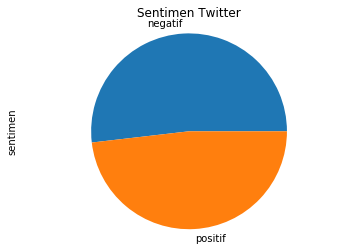

In [40]:
hasil_sentimen.sentimen.value_counts().plot(kind='pie')
plt.axis('equal')
plt.title('Sentimen Twitter')

#  Hyperparameter

In [41]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
error = []

#Calculating error for K values between 1 and 40
for i in range(150, 200):  
    knn = KNeighborsClassifier(n_neighbors=i)
    model = Pipeline([('vectorizer',tvec)
                 ,('classifier',knn)])
    model.fit(x_train,y_train)
    hasil=model.predict(x_test)
    error.append(np.mean(hasil != y_test))

Text(0, 0.5, 'Error rata-rata')

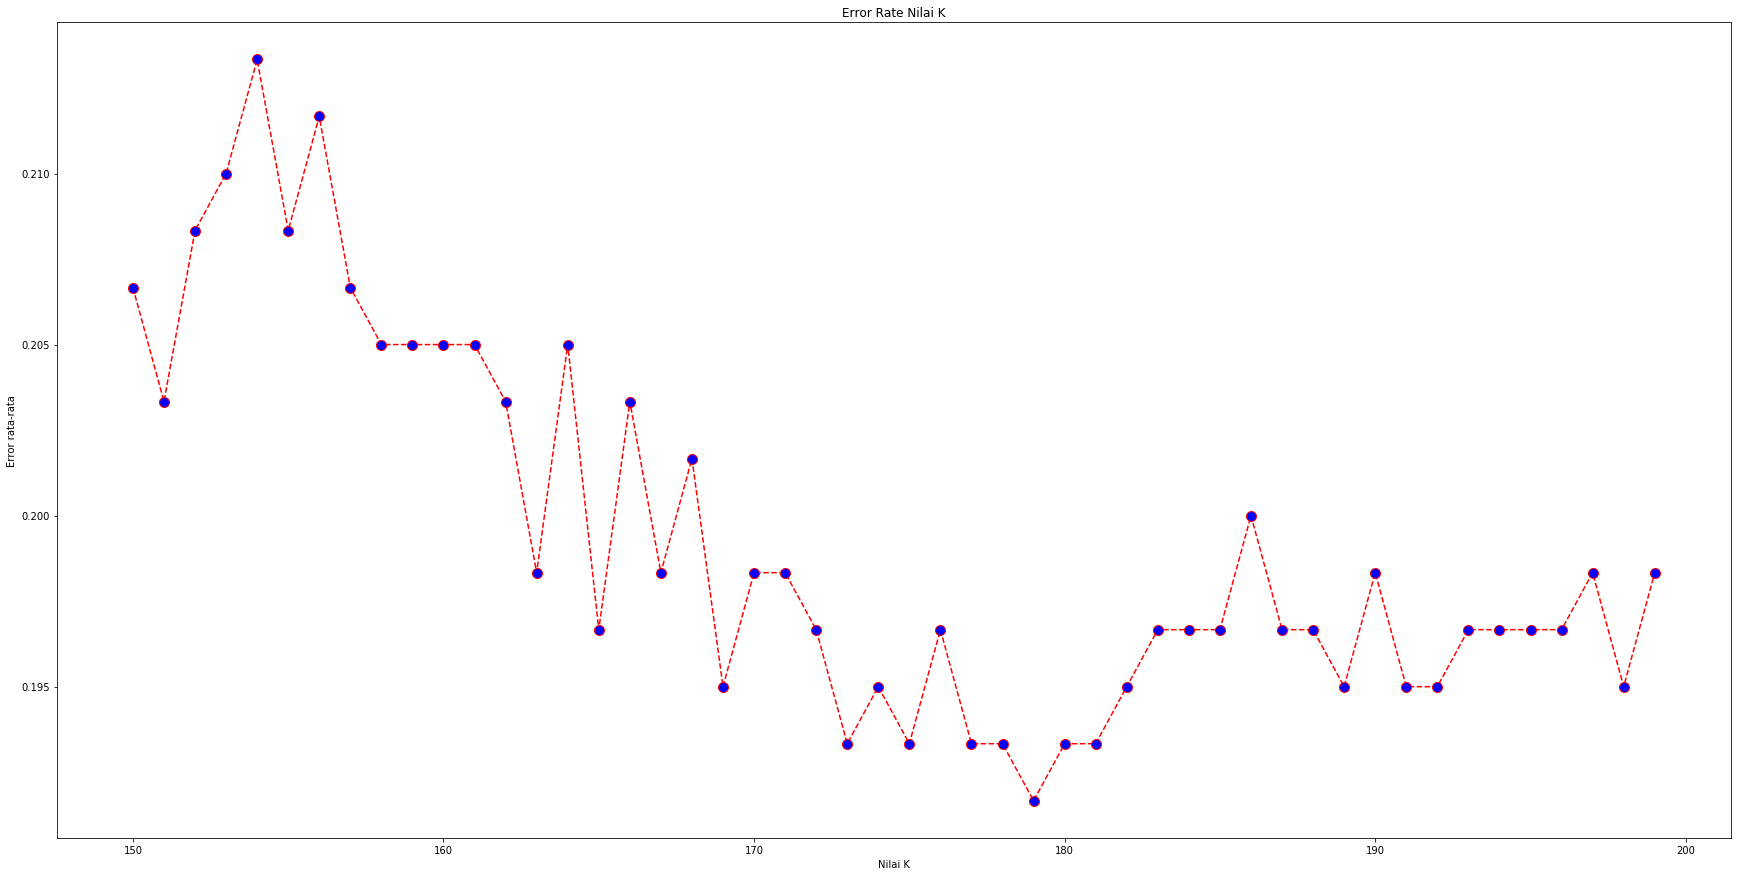

In [42]:
plt.figure(figsize=(30, 15))  
plt.plot(range(150, 200), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate Nilai K')  
plt.xlabel('Nilai K')  
plt.ylabel('Error rata-rata')